In [1]:
import requests
import urllib
import json
import datetime
import time
import csv
import pandas as pd
import numpy as np

In [2]:
api_key = 'RGAPI-7640cf2f-d2e1-4e5f-9a0c-9d9c7686bdb9'

---

In [3]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.82 Safari/537.36",
    "Accept-Language": "ko-KR,ko;q=0.9,en-US;q=0.8,en;q=0.7",
    "Accept-Charset": "application/x-www-form-urlencoded; charset=UTF-8",
    "Origin": "https://developer.riotgames.com",
    "X-Riot-Token": api_key
}

In [4]:
user_name = 'Spice and WoIf'

user_name = user_name.replace(' ','%20')
request_url = f'https://kr.api.riotgames.com/lol/summoner/v4/summoners/by-name/{user_name}'

In [5]:
today = datetime.datetime.today()

year = today.year
month = today.month
day = today.day
hour = today.hour

In [6]:
response = requests.get(request_url, headers = headers)
result = response.json()
print('Status Code : ',response)

Status Code :  <Response [200]>


In [7]:
res = urllib.request.Request(request_url)

for key,value in headers.items() : 
    res.add_header(key, value)
response = urllib.request.urlopen(res)
result = response.readlines()

result = json.loads(result[0].decode('utf-8'))

print('Status Code : ',response.getcode())

Status Code :  200


In [8]:
user_puuid = result.get('puuid')
user_name = result.get('name')
user_level = result.get('summonerLevel')

print(f'{year}년 {month}월 {day}일 {hour}시 기준\n{user_name} : {user_level}레벨')

2023년 4월 12일 6시 기준
Spice and WoIf : 84레벨


---

In [9]:
user_puuid = 'NfnmXzBi9XqUFwwUzBfMLeBEXJombjPpLSJISDJ_7jVMTdkwUdGAH4t0DXg2Ff6nXxGFLtBxSiVKZA'

In [10]:
request_url = f'https://asia.api.riotgames.com/tft/match/v1/matches/by-puuid/{user_puuid}/ids'

In [11]:
start_time = datetime.datetime(2022,1,1,0,0) # 1월 1일 0시 0분
start_time = int(time.mktime(start_time.timetuple()))
print(start_time)

end_time = datetime.datetime(2022,1,31,23,59,59) # 1월 31일 23시 59분
end_time = int(time.mktime(end_time.timetuple()))
print(end_time)

1640995200
1643673599


---

In [12]:
request_url = f'https://asia.api.riotgames.com/tft/match/v1/matches/by-puuid/{user_puuid}/ids'

In [13]:
response = requests.get(request_url, headers = headers)
matches = response.json()
print('Status Code : ',response)
matches

Status Code :  <Response [200]>


['KR_6447351927',
 'KR_6446079620',
 'KR_6439595205',
 'KR_6439584404',
 'KR_6439570738',
 'KR_6438606244',
 'KR_6438555648',
 'KR_6438522957',
 'KR_6438423578',
 'KR_6438399984',
 'KR_6438359514',
 'KR_6438343623',
 'KR_6437185137',
 'KR_6437147016',
 'KR_6436940454',
 'KR_6436917645',
 'KR_6436887401',
 'KR_6436844903',
 'KR_6436814646',
 'KR_6436762876']

---

In [14]:
request_url = f'https://asia.api.riotgames.com/tft/match/v1/matches/{matches[0]}'
response = requests.get(request_url, headers = headers)
match_result = response.json()
print('Status Code : ',response)

Status Code :  <Response [200]>


In [15]:
with open('/item_list.csv', 'r', encoding='EUC-KR') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    items_list = [row['Name'] for row in csv_reader]
    for row in csv_reader:
        print(row)

In [16]:
items_list

['최후의 속삭임',
 '영겁의 속삭임',
 '죽음의 검',
 '무한의 대검',
 '빛나는 죽음의 검',
 '천공의 대검',
 '우르프 천사의 지팡이',
 '모렐로노미콘',
 '라바돈의 초월한 죽음모자',
 '눈부신 건틀릿',
 '대천사의 지팡이',
 '보석 건틀릿',
 '엔젤로노미콘',
 '라바돈의 죽음모자',
 '스태틱의 호의',
 '스태틱의 단검',
 '집단 충격기',
 '자화 이온 충격기',
 '이온 충격기',
 'B.F. 대검',
 '쓸데없이 큰 지팡이',
 '쇠사슬 조끼',
 '곡궁',
 '뒤집개',
 '여신의 눈물',
 '거인의 허리띠',
 '음전자 망토',
 '연습용 장갑',
 'tft_item_name_FracturedMirrorEmptySlot',
 '마법공학 생명검',
 '구인수의 격노검',
 '히라나의 창',
 '악마 학살자',
 '방패파괴자',
 '피바라기',
 '푸른 축복',
 '쇼진의 창',
 '밤의 끝자락',
 '마나자네',
 '구인수의 심판',
 '공정의 주먹',
 '수은',
 '거인 학살자',
 '과부하_ 오류 // 거인 학살자 ',
 '축복받은 피바라기',
 '푸른 파수꾼',
 '의지파괴자',
 '톱날 피바라기',
 '용수철이 든 고속 연사포',
 '루난의 폭풍',
 '죽음의 저항',
 '반짝이는 수은',
 '마법공학 총검',
 '새벽의 서광',
 '흑요석 양날 도끼',
 '날뛰는 쇼진의 창',
 '거인의 맹세',
 '고속 연사포',
 '무한한 삼위일체',
 '황금 징수의 총',
 '고속 광자포',
 '비결정적 정의의 손길',
 '루난의 허리케인',
 '정의의 손길',
 '거인의 결의',
 '기계유망주 상징',
 '선의 상징',
 '황소부대 상징',
 '주문투척자 상징',
 '정찰단 상징',
 '별 수호자 상징',
 '자동방어체계 문장',
 '해커 상징',
 '마스코트 상징',
 '레이저단 상징',
 '에이스 상징',
 '메카: 프라임 상징',
 '지하세계 상징',
 '싸움꾼 상징',
 '익살꾼 상징',
 '무법자 상징',
 

In [17]:
items_dict = {name: idx for idx, name in enumerate(items_list)}

In [18]:
items_dict

{'최후의 속삭임': 0,
 '영겁의 속삭임': 1,
 '죽음의 검': 2,
 '무한의 대검': 3,
 '빛나는 죽음의 검': 4,
 '천공의 대검': 5,
 '우르프 천사의 지팡이': 6,
 '모렐로노미콘': 7,
 '라바돈의 초월한 죽음모자': 8,
 '눈부신 건틀릿': 9,
 '대천사의 지팡이': 10,
 '보석 건틀릿': 11,
 '엔젤로노미콘': 12,
 '라바돈의 죽음모자': 13,
 '스태틱의 호의': 14,
 '스태틱의 단검': 15,
 '집단 충격기': 16,
 '자화 이온 충격기': 17,
 '이온 충격기': 18,
 'B.F. 대검': 19,
 '쓸데없이 큰 지팡이': 20,
 '쇠사슬 조끼': 21,
 '곡궁': 22,
 '뒤집개': 23,
 '여신의 눈물': 24,
 '거인의 허리띠': 25,
 '음전자 망토': 26,
 '연습용 장갑': 27,
 'tft_item_name_FracturedMirrorEmptySlot': 28,
 '마법공학 생명검': 29,
 '구인수의 격노검': 30,
 '히라나의 창': 31,
 '악마 학살자': 32,
 '방패파괴자': 33,
 '피바라기': 34,
 '푸른 축복': 35,
 '쇼진의 창': 36,
 '밤의 끝자락': 37,
 '마나자네': 38,
 '구인수의 심판': 39,
 '공정의 주먹': 40,
 '수은': 41,
 '거인 학살자': 42,
 '과부하_ 오류 // 거인 학살자 ': 43,
 '축복받은 피바라기': 44,
 '푸른 파수꾼': 45,
 '의지파괴자': 46,
 '톱날 피바라기': 47,
 '용수철이 든 고속 연사포': 48,
 '루난의 폭풍': 49,
 '죽음의 저항': 50,
 '반짝이는 수은': 51,
 '마법공학 총검': 52,
 '새벽의 서광': 53,
 '흑요석 양날 도끼': 54,
 '날뛰는 쇼진의 창': 55,
 '거인의 맹세': 56,
 '고속 연사포': 57,
 '무한한 삼위일체': 58,
 '황금 징수의 총': 59,
 '고속 광자포': 60,
 '비결정적 정의

---

In [19]:
match_user_info = [x for x in match_result.get('info').get('participants') if x.get('puuid') == user_puuid][0]

In [20]:
total_damage_to_players = match_user_info.get('total_damage_to_players')
players_eliminated = match_user_info.get('players_eliminated')
gold_left = match_user_info.get('gold_left')
level = match_user_info.get('level')
last_round = match_user_info.get('last_round')
placement = match_user_info.get('placement')

In [21]:
match_user_traits =  match_user_info.get('traits')
match_user_units =  match_user_info.get('units')

In [22]:
total_damage_to_players = 0
players_eliminated = 0
gold_left = 0
level = 0
last_round = 0
placement = 0

match_traits = {}
match_units = {}
match_items = {}

for match in matches : 
    request_url = f'https://asia.api.riotgames.com/tft/match/v1/matches/{match}'
    response = requests.get(request_url, headers = headers)
    match_result = response.json()
    
    match_user_info = [x for x in match_result.get('info').get('participants') if x.get('puuid') == user_puuid][0]
    total_damage_to_players += match_user_info.get('total_damage_to_players')
    players_eliminated += match_user_info.get('players_eliminated')
    gold_left += match_user_info.get('gold_left')
    level += match_user_info.get('level')
    last_round += match_user_info.get('last_round')
    placement += match_user_info.get('placement')
    match_user_traits =  match_user_info.get('traits')
    match_user_units =  match_user_info.get('units')
    
    match_traits.update({trait : match_traits.get(trait,0)+unit_num for trait, unit_num in [[x.get('name'), x.get('num_units')] for x in match_user_traits]})
    match_units.update({character : match_units.get(character,0)+1 for character, tier in [[x.get('character_id'), x.get('tier')] for x in match_user_units]})
    for item in [item for items in [x.get('items_list') for x in match_user_units] for item in items_list] : 
        match_items[item] = match_items.get(item,0) + 1

In [23]:
print(f"""
한 판당 평균 가한 데미지       : {total_damage_to_players / 20}
한 판당 평균 제거 적의 수      : {players_eliminated / 20}
한 판당 평균 남긴 골드 량      : {gold_left / 20}
한 판당 평균 레벨              : {level / 20}
한 판당 평균 살아남은 라운드   : {last_round / 20}
한 판당 평균 순위              : {placement / 20}

20판동안 가장 많이 사용한 특성 : {[x[0] for x in sorted([[trait, num] for trait, num in match_traits.items()], key = lambda x: x[1], reverse= True)[:5]]},
20판동안 가장 많이 사용한 유닛 : {[x[0] for x in sorted([[unit, num] for unit, num in match_units.items()], key = lambda x: x[1], reverse= True)[:5]]},
20판동안 가장 많이 사용한 템   : {[items_dict.get(x[0]) for x in sorted([[item, num] for item, num in match_items.items()], key = lambda x: x[1], reverse= True)[:5]]},

""")


한 판당 평균 가한 데미지       : 64.35
한 판당 평균 제거 적의 수      : 1.35
한 판당 평균 남긴 골드 량      : 6.95
한 판당 평균 레벨              : 7.75
한 판당 평균 살아남은 라운드   : 29.75
한 판당 평균 순위              : 4.1

20판동안 가장 많이 사용한 특성 : ['Set8_Admin', 'Set8_Duelist', 'Set8_Pulsefire', 'Set8_Brawler', 'Set8_Hacker'],
20판동안 가장 많이 사용한 유닛 : ['TFT8_Shen', 'TFT8_Blitzcrank', 'TFT8_Camille', 'TFT8_Leblanc', 'TFT8_Aatrox'],
20판동안 가장 많이 사용한 템   : [0, 1, 2, 3, 4],




---

In [24]:
base_url = "https://kr.api.riotgames.com/tft/"

In [25]:
request_header = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/97.0.4692.99 Safari/537.36",
    "Accept-Language": "ko-KR,ko;q=0.9,en-US;q=0.8,en;q=0.7",
    "Accept-Charset": "application/x-www-form-urlencoded; charset=UTF-8",
    "Origin": "https://developer.riotgames.com",
    "X-Riot-Token": api_key
    }

In [89]:
# challenger
challenger_url = base_url + 'league/v1/challenger'
challenger = requests.get(challenger_url, headers = request_header).json()

# grandmaster
grandmaster_url = base_url + 'league/v1/grandmaster'
grandmaster = requests.get(grandmaster_url, headers = request_header).json()

# master
master_url = base_url + 'league/v1/master'
master = requests.get(master_url, headers = request_header).json()

In [90]:
pd.DataFrame(challenger)
pd.DataFrame(grandmaster)
pd.DataFrame(master)

,tier,leagueId,queue,name,entries
0,MASTER,b8b79e4d-abda-3341-b086-b706bc960db1,RANKED_TFT,Fiddlesticks's Ravagers,{'summonerId': 'wJ0nKYOZlXphFxwQAO5TfYOpvmCAis...
1,MASTER,b8b79e4d-abda-3341-b086-b706bc960db1,RANKED_TFT,Fiddlesticks's Ravagers,{'summonerId': '_FAOhG34woPLgsnBTaRU-q-LiNfNkq...
2,MASTER,b8b79e4d-abda-3341-b086-b706bc960db1,RANKED_TFT,Fiddlesticks's Ravagers,{'summonerId': 'HwxwxL5bRr1hfCx-17ubSbQPixKzw-...
3,MASTER,b8b79e4d-abda-3341-b086-b706bc960db1,RANKED_TFT,Fiddlesticks's Ravagers,{'summonerId': 'QlUPRQ2NbOrLLSTwO_oC-FpGkC2Qet...
4,MASTER,b8b79e4d-abda-3341-b086-b706bc960db1,RANKED_TFT,Fiddlesticks's Ravagers,{'summonerId': 'xUkS5bMustNA7AE81wGOC4eLEfZCvt...
...,...,...,...,...,...
5137,MASTER,b8b79e4d-abda-3341-b086-b706bc960db1,RANKED_TFT,Fiddlesticks's Ravagers,{'summonerId': 'xX5aRGutBgAYlR6CdCoSvHRX1Pi_w0...
5138,MASTER,b8b79e4d-abda-3341-b086-b706bc960db1,RANKED_TFT,Fiddlesticks's Ravagers,{'summonerId': '15j5m56u7BahxWOrgFwgdkx1LKn4vP...
5139,MASTER,b8b79e4d-abda-3341-b086-b706bc960db1,RANKED_TFT,Fiddlesticks's Ravagers,{'summonerId': 'k9s3bL3vYM2NWRRTCpYJWyfi2vTHDe...
5140,MASTER,b8b79e4d-abda-3341-b086-b706bc960db1,RANKED_TFT,Fiddlesticks's Ravagers,{'summonerId': 'el_xcKQuSoR6lXObOzfmaGRYA-lf9G...


In [93]:
challenger_df = pd.DataFrame(challenger['entries'])
grandmaster_df = pd.DataFrame(grandmaster['entries'])
master_df = pd.DataFrame(master['entries'])

In [94]:
challenger_df

,summonerId,summonerName,leaguePoints,rank,wins,losses,veteran,inactive,freshBlood,hotStreak
0,hWwzW1qisLSaGVsKeTBm3Dbc76rOvL1RTjtjPGgunLA0Dg,윤민우왕코,572,I,138,109,False,False,True,False
1,p0wDuPXoOL5GZPrZQKStSGWXydZk1cMMYFa8dlcvgRwE-_...,쏭 우,680,I,97,82,False,False,True,False
2,YiXEaJP7hKCLZ2osbMlXNQbdAhkulAkCrutfUQ4rsqmmozo,투덜이 김피즈,717,I,41,20,False,False,False,True
3,M0xNSeqiAVEcL0acc6CTUNZEG6hN36qY_rQIp3QvUAzGTYw,영오쿤,511,I,46,31,False,False,True,False
4,8H5wEKwmzoa39Y8ErMhimYlhZeBIMzrRJ6HnhigNIkDldWY,꼴픽이,1321,I,143,95,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...
283,uQ_AOqAx_teasITHI02vt_RW_qri75VkwUnERMYeOGz-wvw,진쨔 적당히 좀해,599,I,57,46,False,False,True,True
284,gTaPEtpC0fGEwLjvuJ6tu14Mqttej29lbCcc-23gr8I_PX...,pouty kitty,625,I,73,58,False,False,True,True
285,Xfj5PupsUmwZICGdxCHes3W30j7izVejvRb2O6P_imlAswY,백정1위,506,I,48,33,False,False,True,False
286,qFSglgAGw5SBUUciSlwFVkDRwZUuGdzWi2uViQ-pzkGilg,녕준이,755,I,129,113,False,False,False,True


In [30]:
challenger_df['rank'] = challenger_df['rank'].apply(lambda x: 1 if x == 'I' else x)

In [31]:
import pandas as pd

# 필요한 칼럼만 추출
columns = ['summonerName', 'leaguePoints', 'wins', 'losses']
data = challenger_df[columns]

# 칼럼명 변경
df = data.rename(columns={'summonerName': 'name'})
df = df.drop('name', axis=1)

# 데이터 확인
print(df.head())



   leaguePoints  wins  losses
0           503    94      88
1           726    64      46
2           505   123     112
3           485    67      56
4           503    82      57


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 데이터 전처리
X = challenger_df[['leaguePoints', 'wins', 'losses']]
y = challenger_df['rank']  # 예측할 값 (rank)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 데이터셋 분할

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 평가
y_pred = model.predict(X_test)
r2score = r2_score(y_test, y_pred)
print('R2 Score:', r2score)

R2 Score: 1.0


In [33]:
from sklearn.model_selection import train_test_split

# feature와 target 변수 분리
X = df[['leaguePoints', 'wins', 'losses']]
y = df['wins']

# 데이터를 학습용과 검증용으로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 랜덤포레스트 모델 생성 및 학습
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# 검증용 데이터로 예측 수행
y_pred = rfc.predict(X_test)

# 예측 결과 평가
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.10344827586206896


In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)

# Parameter Grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [10, 20, 30, 40, 50, 60, None]
}

# Grid Search Cross Validation
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best score and best parameters
print(f"Best Accuracy: {grid_search.best_score_:.3f}")
print("Best Parameters:")
best_params = grid_search.best_params_
for param_name in sorted(best_params.keys()):
    print(f"{param_name}: {best_params[param_name]}")


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Accuracy: 0.270
Best Parameters:
max_depth: 20
max_features: sqrt
n_estimators: 100


In [36]:
from sklearn.ensemble import RandomForestClassifier

re_model = RandomForestClassifier(n_estimators=50, max_depth=10, max_features='sqrt', random_state=42)

In [37]:
re_X = X
re_y = y

In [38]:
from sklearn.model_selection import cross_val_score

re_model = RandomForestClassifier(n_estimators=50, max_depth=10, max_features='sqrt')
scores = cross_val_score(re_model, re_X, re_y, cv=5)
print("Cross Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross Validation Scores: [0.24137931 0.22413793 0.24137931 0.28070175 0.22807018]
Mean Accuracy: 0.24313369630973986


---

In [39]:
challenger_df = pd.DataFrame(challenger['entries'])
challenger_df['league'] = 'challenger'
challenger_df = challenger_df[['wins', 'leaguePoints', 'losses', 'league']]

grandmaster_df = pd.DataFrame(grandmaster['entries'])
grandmaster_df['league'] = 'grandmaster'
grandmaster_df = grandmaster_df[['wins', 'leaguePoints', 'losses', 'league']]

master_df = pd.DataFrame(master['entries'])
master_df['league'] = 'master'
master_df = master_df[['wins', 'leaguePoints', 'losses', 'league']]

In [40]:
total_df = pd.concat([challenger_df, grandmaster_df, master_df], ignore_index=True)
total_df = total_df[['leaguePoints', 'wins', 'losses', 'league']]

In [41]:
print(total_df.head())

   leaguePoints  wins  losses      league
0           503    94      88  challenger
1           726    64      46  challenger
2           505   123     112  challenger
3           485    67      56  challenger
4           503    82      57  challenger


In [42]:
from sklearn.model_selection import train_test_split

X = total_df[['wins', 'losses']]
y = total_df['leaguePoints']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [44]:
from sklearn.metrics import r2_score

y_pred = rf_reg.predict(X_test)
score = r2_score(y_test, y_pred)
print("R2 Score: {:.3f}".format(score))

R2 Score: 0.077


---

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [47]:
y_pred = lr.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.23238731612544472

---

In [48]:
total_df_og = total_df

In [49]:
total_df.to_csv('total_df.csv', index=False)

In [50]:
total_df

,leaguePoints,wins,losses,league
0,503,94,88,challenger
1,726,64,46,challenger
2,505,123,112,challenger
3,485,67,56,challenger
4,503,82,57,challenger
...,...,...,...,...
6013,140,99,89,master
6014,10,28,25,master
6015,20,29,23,master
6016,37,47,39,master


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 데이터 불러오기
total_df = pd.read_csv('total_df.csv')

# 'league' 칼럼 제거
total_df = total_df.drop(['league'], axis=1)

# 훈련셋과 테스트셋 나누기
X_train, X_test, y_train, y_test = train_test_split(total_df.drop('leaguePoints', axis=1), total_df['leaguePoints'], test_size=0.2, random_state=42)

# 선형 회귀 모델 객체 생성 및 학습
lr = LinearRegression()
lr.fit(X_train, y_train)

# 테스트셋 예측
y_pred = lr.predict(X_test)

# R2 score 계산
r2 = r2_score(y_test, y_pred)
print('R2 Score:', r2)


R2 Score: 0.23238731612544472


---

In [55]:
total_df['winRate'] = total_df['wins'] / (total_df['wins'] + total_df['losses'])

In [56]:
total_df

,leaguePoints,wins,losses,winRate
0,503,94,88,0.516484
1,726,64,46,0.581818
2,505,123,112,0.523404
3,485,67,56,0.544715
4,503,82,57,0.589928
...,...,...,...,...
6013,140,99,89,0.526596
6014,10,28,25,0.528302
6015,20,29,23,0.557692
6016,37,47,39,0.546512


In [57]:
from sklearn.model_selection import train_test_split

# train set과 test set으로 데이터셋 분리
train_df, test_df = train_test_split(total_df, test_size=0.2, random_state=42)

In [59]:
total_df = total_df_og

In [61]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
total_df['league_encoded'] = le.fit_transform(total_df['league'])

In [63]:
# 머신러닝 모델 초기화
lr_model = LinearRegression()

# 학습에 사용할 특성(feature) 선택
# 여기에서는 'leaguePoints', 'wins', 'losses', 'winRate' 4가지를 사용합니다.
features = ['leaguePoints', 'wins', 'losses', 'winRate']
X_train = train_df[features]
y_train = train_df['winRate']

# 모델 학습
lr_model.fit(X_train, y_train)

LinearRegression()

In [65]:
from sklearn.metrics import mean_absolute_error

# test set에서 예측 성능 평가를 위한 특성(feature) 선택
X_test = test_df[features]
y_test = test_df['wins']

# 예측 결과 도출
y_pred = lr_model.predict(X_test)

# 평가 지표인 MAE(Mean Absolute Error) 계산
mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)


MAE: 60.18809736129383


In [69]:
total_df['winRate'] = total_df['wins'] / (total_df['wins'] + total_df['losses'])

In [70]:
total_df

,leaguePoints,wins,losses,league,league_encoded,winRate
0,503,94,88,challenger,0,0.516484
1,726,64,46,challenger,0,0.581818
2,505,123,112,challenger,0,0.523404
3,485,67,56,challenger,0,0.544715
4,503,82,57,challenger,0,0.589928
...,...,...,...,...,...,...
6013,140,99,89,master,2,0.526596
6014,10,28,25,master,2,0.528302
6015,20,29,23,master,2,0.557692
6016,37,47,39,master,2,0.546512


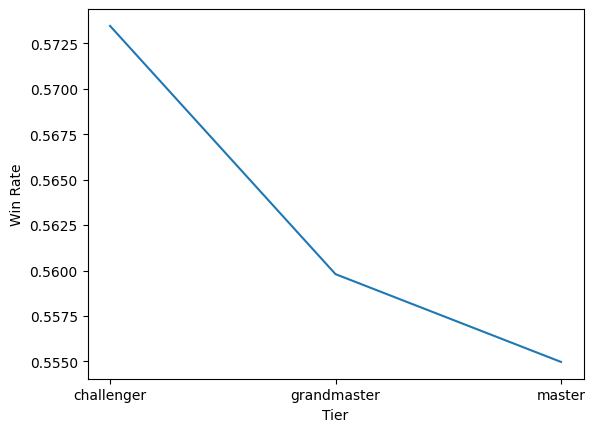

In [75]:
import matplotlib.pyplot as plt

# 티어별로 winRate 평균 구하기
winrate_by_tier = total_df.groupby('league')['winRate'].mean()

# 시각화
plt.plot(winrate_by_tier.index, winrate_by_tier.values)
plt.xlabel('Tier')
plt.ylabel('Win Rate')
plt.show()

In [99]:
total_df['pansu'] = total_df['wins'] + total_df['losses']

In [100]:
total_df

,leaguePoints,wins,losses,league,league_encoded,winRate,pansu
0,503,94,88,challenger,0,0.516484,182
1,726,64,46,challenger,0,0.581818,110
2,505,123,112,challenger,0,0.523404,235
3,485,67,56,challenger,0,0.544715,123
4,503,82,57,challenger,0,0.589928,139
...,...,...,...,...,...,...,...
6013,140,99,89,master,2,0.526596,188
6014,10,28,25,master,2,0.528302,53
6015,20,29,23,master,2,0.557692,52
6016,37,47,39,master,2,0.546512,86


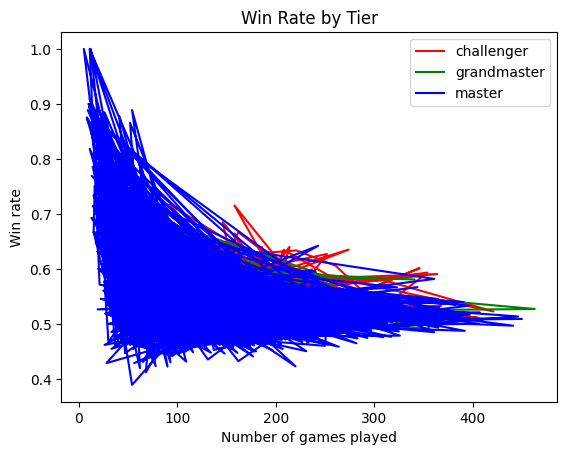

In [104]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# 티어별로 선 그래프를 그리기 위해 for loop 사용
for league, color in zip(['challenger', 'grandmaster', 'master'], ['r', 'g', 'b']):
    # 각 티어에 해당하는 데이터 추출
    league_df = total_df[total_df['league'] == league]
    
    # x축: 판수, y축: 승률
    x = league_df['pansu']
    y = league_df['winRate']
    
    # 선 그래프를 그리기 위해 plot 사용
    ax.plot(x, y, color=color, label=league)

# 그래프 타이틀과 축 라벨 설정
ax.set_title('Win Rate by Tier')
ax.set_xlabel('Number of games played')
ax.set_ylabel('Win rate')

# 범례 추가
ax.legend()

# 그래프 출력
plt.show()


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='pansu', ylabel='winRate'>

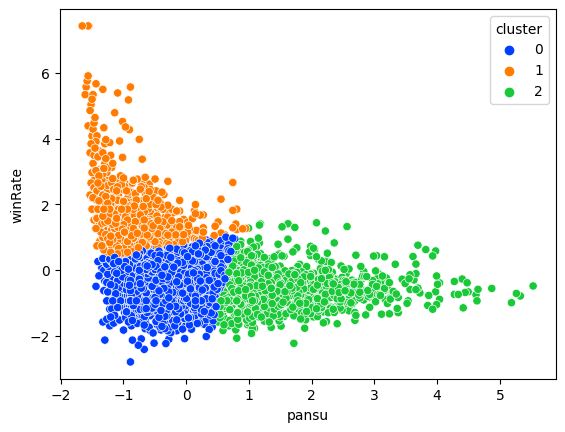

In [106]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

# 데이터 표준화
scaler = StandardScaler()
total_df[['pansu', 'winRate']] = scaler.fit_transform(total_df[['pansu', 'winRate']])

# 클러스터링
kmeans = KMeans(n_clusters=3, random_state=0)
total_df['cluster'] = kmeans.fit_predict(total_df[['pansu', 'winRate']])

# 시각화
sns.scatterplot(x='pansu', y='winRate', data=total_df, hue='cluster', palette='bright')


---

In [108]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# 학습에 사용할 칼럼 선택
X = total_df[['pansu', 'winRate']]
y = total_df['cluster']

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 의사결정트리 모델 학습
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = tree.predict(X_test)


In [109]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.9966777408637874


/usr/local/lib/python3.9/dist-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


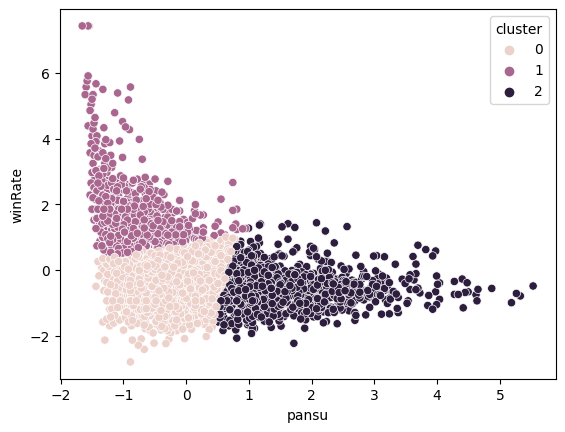

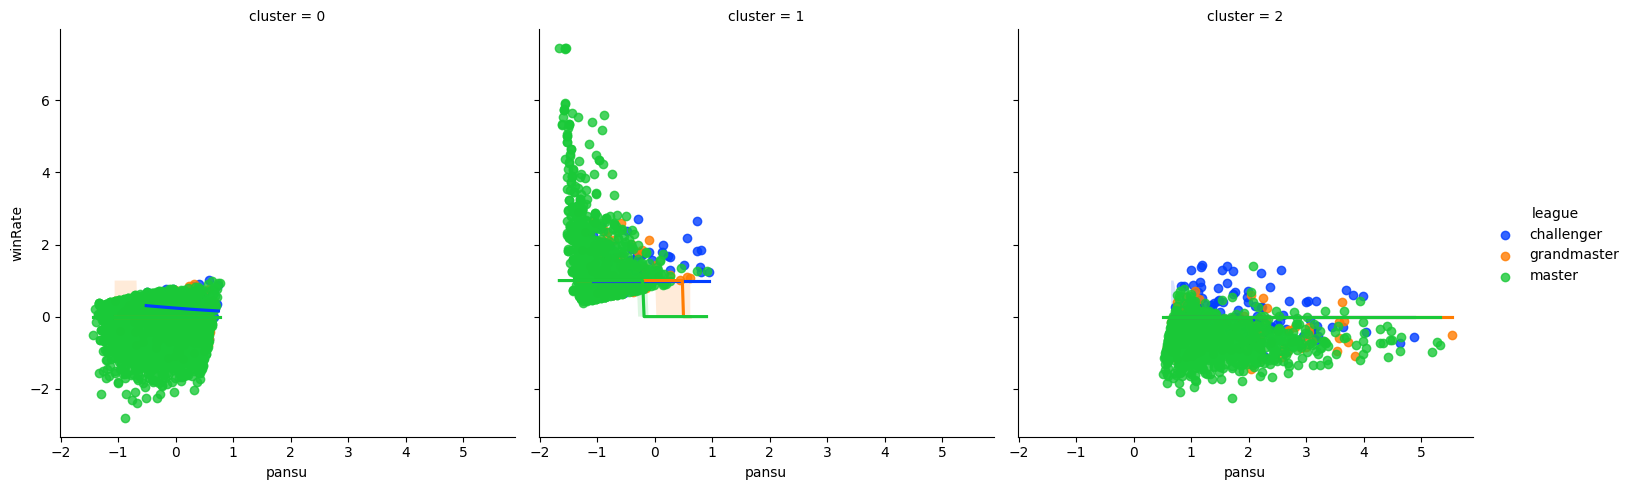

In [110]:
import seaborn as sns

# scatterplot으로 클러스터링 결과 시각화
sns.scatterplot(data=total_df, x='pansu', y='winRate', hue='cluster')

# lmplot으로 의사결정 트리 경계 시각화
sns.lmplot(data=total_df, x='pansu', y='winRate', hue='league', col='cluster', palette='bright', logistic=True, y_jitter=.03)


Text(0.5, 1.0, 'Predicted clusters')

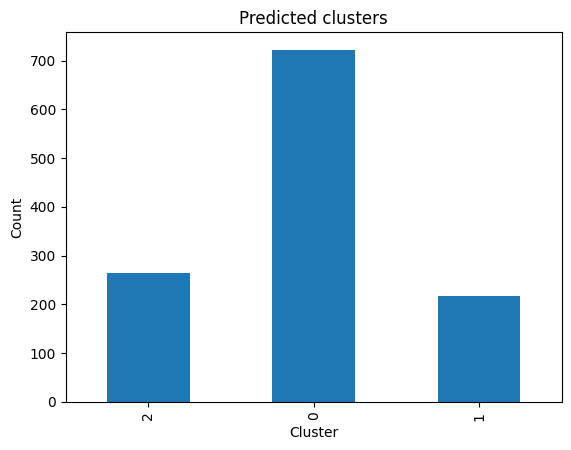

In [111]:
from collections import Counter
import pandas as pd

# 클래스별 예측 개수 구하기
pred_counts = dict(Counter(y_pred))

# 예측 개수를 데이터프레임으로 변환
pred_df = pd.DataFrame.from_dict(pred_counts, orient='index', columns=['count'])

# 데이터프레임에 인덱스 이름 추가
pred_df.index.name = 'cluster'

# 예측 개수를 바 차트로 시각화
ax = pred_df.plot(kind='bar', legend=False)
ax.set_xlabel('Cluster')
ax.set_ylabel('Count')
ax.set_title('Predicted clusters')


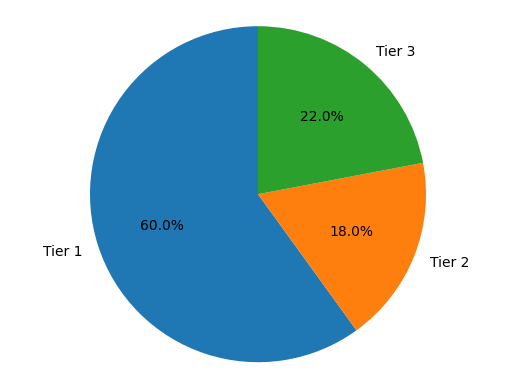

In [113]:
import matplotlib.pyplot as plt

# 테스트 데이터에 대한 예측 확률
y_proba = tree.predict_proba(X_test)

# 클래스(티어) 별 예측 확률 합산
class_probs = [y_proba[:, i].sum() for i in range(3)]

# 파이 차트 생성
labels = ['Tier 1', 'Tier 2', 'Tier 3']
plt.pie(class_probs, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()
